In [694]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Загружаем датасет

In [695]:
data = pd.read_csv("SomervilleHappinessSurvey2015.csv", encoding='utf-16')
data.head()

,D,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


Датасет содержит информацию о том является ли человек счастливым(параметр D в этом случае равен 1) или несчастливым, а также оценку условий жизни в конкретном районе, например, цену жилья, качество школ, доверие полиции по шкале от 1 до 5(параметры X1-X6). Соотвественно, ставим себе задачу оперделить счастлив ли человек или нет, зная ответ на эти вопросы.

Подробное описание параметров:

D = decision attribute (D) with values 0 (unhappy) and 1 (happy)

X1 = the availability of information about the city services

X2 = the cost of housing

X3 = the overall quality of public schools

X4 = your trust in the local police

X5 = the maintenance of streets and sidewalks

X6 = the availability of social community events

In [ ]:
data.describe()

,D,X1,X2,X3,X4,X5,X6
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.538462,4.314685,2.538462,3.265734,3.699301,3.615385,4.216783
std,0.500271,0.799820,1.118155,0.992586,0.888383,1.131639,0.848693
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Можно видеть, что пропусков в данных нет, выбросов также не наблюдается

In [ ]:
data.corr()

,D,X1,X2,X3,X4,X5,X6
D,1.000000,0.312740,0.019368,0.163639,0.113356,0.206685,0.220729
X1,0.312740,1.000000,0.092676,0.301971,0.104378,0.399203,0.417521
X2,0.019368,0.092676,1.000000,0.181081,0.107432,-0.002141,0.024546
X3,0.163639,0.301971,0.181081,1.000000,0.298898,0.329874,0.207006
X4,0.113356,0.104378,0.107432,0.298898,1.000000,0.269420,0.199151
X5,0.206685,0.399203,-0.002141,0.329874,0.269420,1.000000,0.307402
X6,0.220729,0.417521,0.024546,0.207006,0.199151,0.307402,1.000000


Сильной корреляции между признаками также нет. Разобьем датасет на обучающую и тестовую части

In [706]:
from sklearn.model_selection import train_test_split
x = data.iloc[:, 1:]
d = data.iloc[:, 0]
x_train, x_test, d_train, d_test = train_test_split(x, d, test_size=0.20)

(array([66.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 77.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

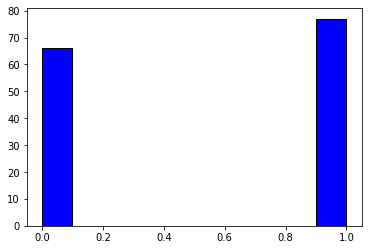

In [ ]:
plt.hist(data['D'], color = 'blue', edgecolor = 'black')

(array([ 1.,  0.,  0.,  0.,  0., 24.,  0., 46.,  0., 72.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

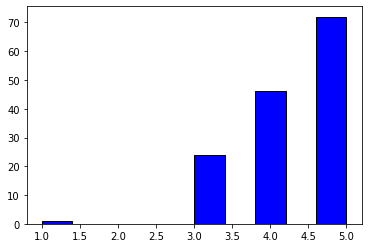

In [ ]:
plt.hist(data['X1'], color = 'blue', edgecolor = 'black')

(array([ 8.,  0., 18.,  0.,  0., 27.,  0., 58.,  0., 32.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

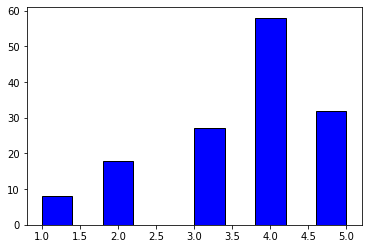

In [ ]:
plt.hist(data['X3'], color = 'blue', edgecolor = 'black')

(array([ 8.,  0., 18.,  0.,  0., 27.,  0., 58.,  0., 32.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

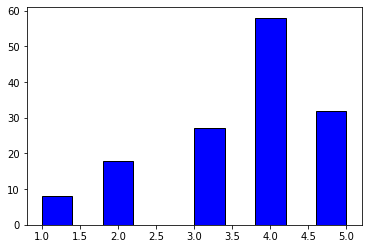

In [ ]:
plt.hist(data['X5'], color = 'blue', edgecolor = 'black')

(array([21.,  0., 33.,  0.,  0., 37.,  0., 16.,  0.,  7.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

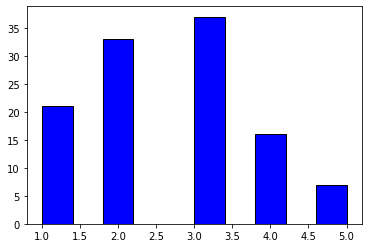

In [ ]:
plt.hist(x_train.iloc[:, 1], color = 'blue', edgecolor = 'black')

#Алгортим K ближайших соседей с весами


In [ ]:
class SimpleKNNClassifier:
  def __init__(self, neighbours = 5):
    self.neighbours = neighbours

  def fit(self, data, labels):
    self.data = data
    self.labels = labels
    self.number_of_labels = len(np.unique(labels))

  def predict(self, item):
    distances = np.sum((item[np.newaxis, :] - self.data[:]) ** 2, axis=1)
    nearest = np.argsort(distances)
    scores = np.zeros(self.number_of_labels)
    for i in range(self.neighbours):
        if distances[nearest[i]] == 0:
          return self.labels[nearest[i]]
        else:
          weight = 1 / distances[nearest[i]]
        scores[self.labels[nearest[i]]] += weight     
    return scores.argmax()    
  

Сравним точность предсказаний в зависимости от выбора количества соседей

In [707]:
from sklearn.metrics import accuracy_score
accuracy = []
for i in range(1, 40):
  results = []
  x = SimpleKNNClassifier(i)
  x.fit(x_train.to_numpy(), d_train.to_numpy())
  for j in range(len(d_test)):
    results.append(x.predict(x_test.iloc[j, :].to_numpy()))
  counter = 0
  for j in range(len(d_test)):
    if results[j] == d_test.iloc[j]:
        counter += 1
  accuracy.append(accuracy_score(d_test, results))       

График зависимости точности предсказаний от числа соседей

Text(0, 0.5, 'Accuracy')

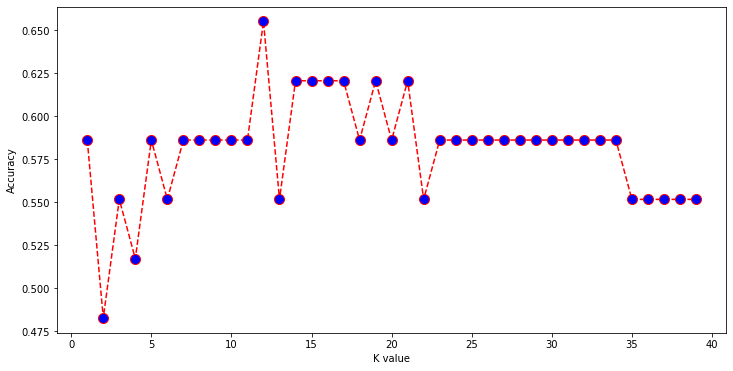

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.xlabel('K value')
plt.ylabel('Accuracy')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
accuracy = []
for i in range(1, 40):
  model = KNeighborsClassifier(n_neighbors=i, weights='distance')
  model.fit(x_train, d_train)
  accuracy.append(model.score(x_test, d_test))

Text(0, 0.5, 'Accuracy')

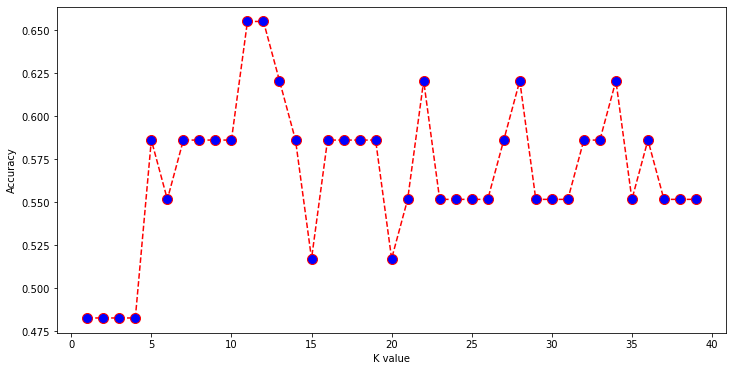

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.xlabel('K value')
plt.ylabel('Accuracy')

#Наивный Байесовский классификатор

In [704]:
from math import exp, pi, sqrt, log

class NaiveBayesClassifier:
  def fit(self, data, labels):
      self.labels_prob = dict()
      for label in labels:
        self.labels_prob.setdefault(label, 0)
        self.labels_prob[label] += 1 
      self.features_prob = [dict() for i in range(len(data[0]))]
      for feat in range(len(data[0])):
        for i in range(len(data)):
          self.features_prob[feat].setdefault(data[i][feat], [0 for _ in range(len(self.labels_prob))])
          self.features_prob[feat][data[i][feat]][labels[i]] += 1 
        for key in self.features_prob[feat]:
          for i in range(len(self.features_prob[feat][key])):
            self.features_prob[feat][key][i] /= self.labels_prob[i]  
      for key in self.labels_prob:
        self.labels_prob[key] /= len(labels)

  def predict(self, item):
    max = 0
    max_i = -1
    for i in range(len(self.labels_prob)):
      current = 0
      for j in range(len(item)):
        self.features_prob[j].setdefault(item[j], [0 for _ in range(len(self.labels_prob))])
        if self.features_prob[j][item[j]][i] != 0:
          current += log(self.features_prob[j][item[j]][i])
      current += log(self.labels_prob[i])
      if current > max or max_i == -1:
        max = current
        max_i = i
    return max_i

In [708]:
f = NaiveBayesClassifier()
f.fit(x_train.to_numpy(), d_train.to_numpy())
results = []
for j in range(len(d_test)):
  results.append(f.predict(x_test.iloc[j]))
counter = 0
print(accuracy_score(d_test, results))

0.5517241379310345


In [ ]:
def calc_prob(val, mean, std):
  return exp(-(val - mean) ** 2 / (2 * std ** 2)) / sqrt(2 * pi * std ** 2)

class NaiveGaussianBayesClassifier:
  def fit(self, data, labels):
    self.labels_prob = dict()
    self.feat_props = []
    for label in labels:
      self.labels_prob.setdefault(label, 0)
      self.labels_prob[label] += 1
    for key in self.labels_prob:
      self.labels_prob[key] /= len(labels)
    for feat in range(len(data[0])):
      counts = [[] for _ in range(len(self.labels_prob))]
      props = []
      for i in range(len(data)):
        counts[labels[i]].append(data[i][feat]) 
      for i in range(len(self.labels_prob)):
        arr = np.array(counts[i])
        props.append((arr.mean(), arr.std()))
      self.feat_props.append(props)  

  def predict(self, item):
    max = -1 * 10 ** 10
    max_i = -1
    for i in range(len(self.labels_prob)):
      current = 0
      for j in range(len(item)):
        current += log(calc_prob(item[j], self.feat_props[j][i][0], self.feat_props[j][i][1]))
      current += log(self.labels_prob[i])
      if current > max or max_i == -1:
        max = current
        max_i = i
    return max_i

In [709]:
xd = NaiveGaussianBayesClassifier()
xd.fit(x_train.to_numpy(), d_train.to_numpy())
results = []
for j in range(len(d_test)):
  results.append(xd.predict(x_test.iloc[j]))
print(accuracy_score(d_test, results))

0.6896551724137931


In [710]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, d_train)
model.score(x_test, d_test)

0.6896551724137931